## 0. PROJECT SETUP

### 0.1. IMPORTS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 0.2. SOURCES

The data set used on this project can be found at: https://data.world/raghu543/credit-card-fraud-data

### 0.3. FUNCTIONS

## 1. CREATING DATAFRAME

### 1.1. INSERTING DATA

In [6]:
df1 = pd.read_csv("creditcard.csv")
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 1.2. ANALYZING THE DATA

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

1. No null values
2. Target variable is the column called "Class"
3. Aside from "Time" and "Amount", all other columns have been PCA reduced and can't be explained
4. No need to change column names or types

## 2. FEATURE ENGINEERING AND EDA

In [5]:
df2 = df1.copy()

### 2.1. MINDMAP OF HYPOTHESIS

Since most columns have been PCA reduced, one can only create hypothesis about the known columns:

1. Does time significantly affect the number of frauds?
2. Does the amount have to do with a transaction being classified as fraud?

### 2.2. UNIVARIATE ANALYSIS

### 2.2.1. TARGET VARIABLE

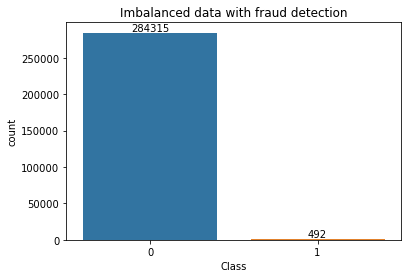

In [11]:
plot = sns.countplot(x = df2['Class'])
labels = df2['Class'].value_counts().values
plot.bar_label(container=plot.containers[0], labels=labels)
plot.set(title = "Imbalanced data with fraud detection");

### 2.2.2. FEATURES

In [15]:
sample = df2.sample(1000)
sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
254305,156669.0,0.010497,0.941075,-0.662060,-0.902317,1.276132,-0.030963,0.967567,-0.024820,0.293717,...,-0.429481,-0.940900,-0.002074,-0.261303,-0.396195,0.124297,0.157354,-0.101501,10.67,0
249529,154450.0,2.041190,-0.049845,-1.160800,0.217688,0.145191,-0.685660,0.133655,-0.216032,0.174624,...,-0.248360,-0.576048,0.277424,-0.312620,-0.257261,0.195363,-0.069530,-0.071404,2.49,0
99368,67086.0,0.034372,-2.336113,0.266525,-0.068551,-1.753702,-0.396029,0.307402,-0.205319,1.872596,...,0.217858,-0.355270,-0.580285,0.452144,0.355991,-0.797497,-0.011909,0.142431,620.97,0
202687,134445.0,-1.104526,1.716083,-1.124709,-0.613869,0.274511,-0.551769,0.208391,0.701513,-0.428360,...,0.513819,1.456796,0.055991,0.760344,-0.705196,-0.287211,0.105205,0.245040,2.29,0
159452,112493.0,0.003812,0.986335,-2.869934,-1.120128,3.551072,2.809154,0.717698,1.030512,-0.869649,...,0.409559,1.003518,0.157891,0.688755,-1.300254,-0.911119,0.229297,0.266327,6.00,0


<AxesSubplot:xlabel='Amount', ylabel='Count'>

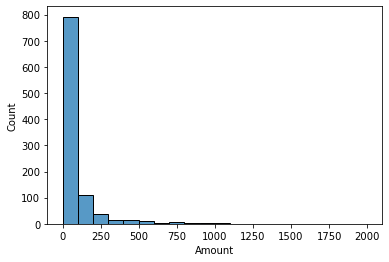

In [19]:
sns.histplot(x = sample['Amount'], bins = 20)